In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import statistics
import seaborn as sns
import matplotlib.pyplot as plt


/Users/skyler/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/skyler/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [3]:
tickers = ['^YH31070020', '^YH31010010','^YH31080030','^YH31070030','^YH31050010']
Companies = ['Specialty Industrial Machinery','Aerospace & Defense','Railroads','Metal Fabrication','Farm & Heavy Construction Machinery']
dic_Companies = {tickers[i]: Companies[i] for i in range(len(tickers))}
data = yf.download(tickers, start='2022-02-01', end="2022-03-10", auto_adjust=True)['Close']
for i in tickers:
    data=data.rename(columns={i:dic_Companies[i]})
returns = (np.log(data / data.shift(1)))*100

[*********************100%%**********************]  5 of 5 completed

1 Failed download:
['^YH31070030']: OperationalError('database is locked')


Text(2022-02-24 00:00:00, -5, '2022/02/24\nRussia-Ukraine war')

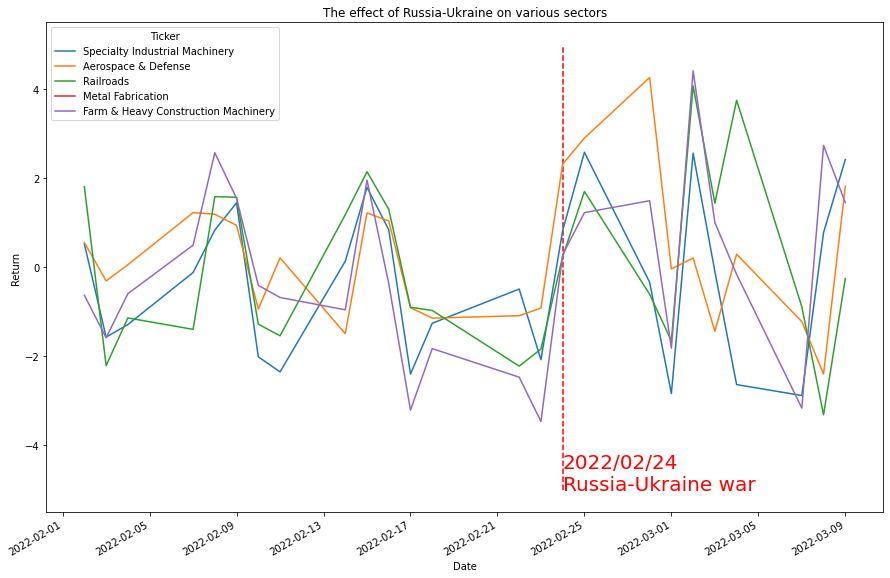

In [4]:
max_price=5
min_price=-5

event_data_U=[datetime(2022, 2, 24)]
event_U='2022/02/24\nRussia-Ukraine war'

Plot_Price=returns[Companies].plot(figsize=(15,10))
plt.title('The effect of Russia-Ukraine on various sectors')
plt.xlabel('Date')
plt.ylabel('Return')

plt.vlines(x=event_data_U, ymin=min_price, ymax=max_price, color='r', linestyle = '--', label=event_U)
plt.text(datetime(2022, 2, 24), min_price, event_U, {'color': 'red', 'fontsize': 20})


#plt.show()

In [5]:
company='^gspc'
#company='ba'
#company='LMT'
#company='^YH31010010'
data = yf.download(company, start="2021-08-01", end="2024-01-01", auto_adjust=True, interval="1wk")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-08-02,4406.859863,4440.819824,4373.000000,4436.520020,19171320000
2021-08-09,4437.770020,4468.370117,4424.740234,4468.000000,17260230000
2021-08-16,4461.649902,4480.259766,4367.729980,4441.669922,19014210000
2021-08-23,4450.290039,4513.330078,4450.290039,4509.370117,17595630000
2021-08-30,4513.759766,4545.850098,4513.759766,4535.430176,18470230000
...,...,...,...,...,...
2023-11-27,4554.859863,4599.390137,4537.240234,4594.629883,21205410000
2023-12-04,4564.370117,4609.229980,4546.500000,4604.370117,20051430000
2023-12-11,4593.390137,4738.569824,4593.390137,4719.189941,27228260000


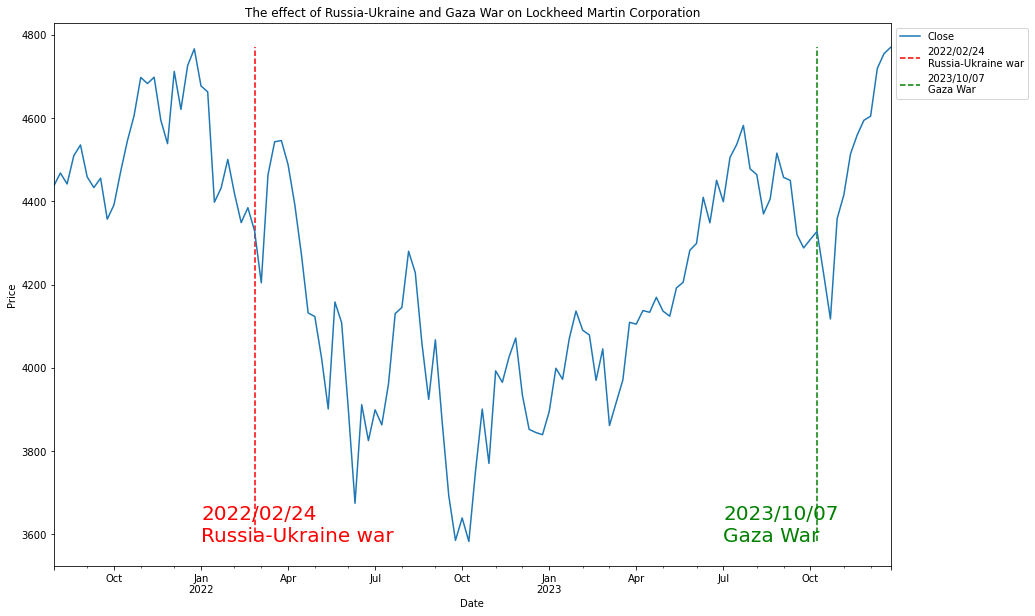

In [6]:
max_price=data['Close'].max()
min_price=data['Close'].min()

event_data_U=[datetime(2022, 2, 24)]
event_U='2022/02/24\nRussia-Ukraine war'

event_data_GH=[datetime(2023, 10, 7)]
event_GH='2023/10/07\nGaza War'

plt.figure(figsize=(15,10))
plt.title('The effect of Russia-Ukraine and Gaza War on Lockheed Martin Corporation')
plt.xlabel('Date')
plt.ylabel('Price')
Plot_Price=data['Close'].plot()

ssss=Plot_Price.vlines(x=event_data_U, ymin=min_price, ymax=max_price, color='r', linestyle = '--', label=event_U)
Plot_Price.legend(bbox_to_anchor=(1, 1), loc='upper left')

x_pos_list=list(Plot_Price.get_xticks())
x_pos=x_pos_list[2]
Plot_Price.text(x_pos, min_price, event_U, {'color': 'red', 'fontsize': 20})


Plot_Price.vlines(x=event_data_GH, ymin=min_price, ymax=max_price, color='g', linestyle = '--', label=event_GH)
Plot_Price.legend(bbox_to_anchor=(1, 1), loc='upper left')

x_pos_=x_pos_list[8]
Plot_Price.text(x_pos_, min_price, event_GH, {'color': 'green', 'fontsize': 20})

plt.show()

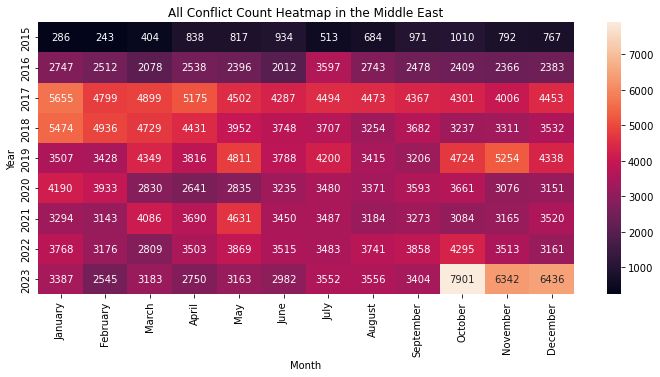

In [9]:
file_path = 'All_Conflict_Middle_East.csv'
col_to_read = ["event_date", "year", "disorder_type", "event_type", "sub_event_type"]
df = pd.read_csv(file_path, usecols=col_to_read)

# Convert 'event_date' to datetime format
df['event_date'] = pd.to_datetime(df['event_date'], format='%d %B %Y')
start_year = df['year'].min()
end_year = df['year'].max()

month = {}
for i in range(start_year, end_year + 1):
    for x in range(1, 13):
        month[(i, x)] = 0

for i in range(len(df['year'])):
    if start_year <= df['year'][i] <= end_year:
        month[(df['year'][i], df['event_date'][i].month)] += 1

violence_in_Middle_East = list(range(start_year, end_year + 1))
event_matrix = np.zeros((len(violence_in_Middle_East), 12))

for i in range(len(violence_in_Middle_East)):
    for j in range(1, 13):
        event_matrix[i, j - 1] = month[(violence_in_Middle_East[i], j)]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
                  'November', 'December']

plt.figure(figsize=(12, 5))
sns.heatmap(event_matrix, annot=True, fmt='g', xticklabels=month_names, yticklabels=violence_in_Middle_East)
plt.xlabel('Month')
plt.ylabel('Year')
plt.title('All Conflict Count Heatmap in the Middle East')
plt.show()

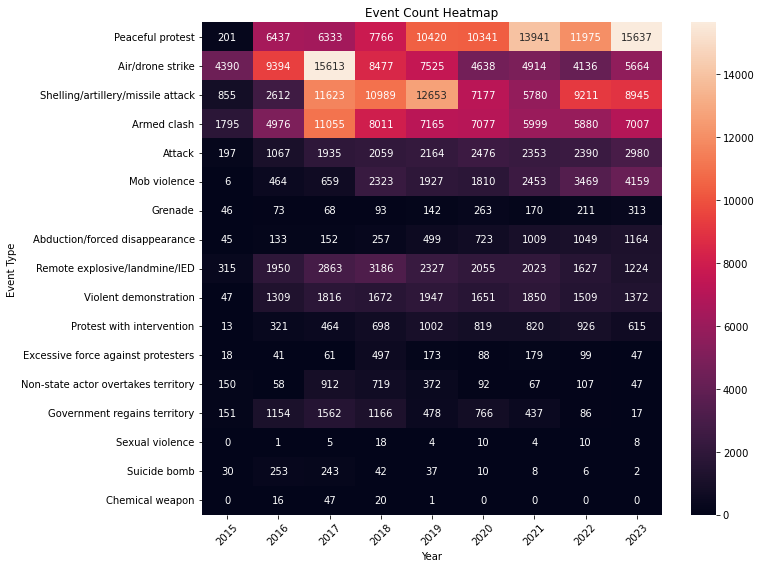

In [28]:
EType={}
yr = [2015,2016,2017,2018,2019,2020,2021,2022,2023,]
name = []
for x in df['sub_event_type']:
    if x not in name:
        name.append(x)
    for i in yr:
        EType[(x,i)]= 0
        
for i in range (len(df['sub_event_type'])):
    EType[(df['sub_event_type'][i],df['year'][i])] += 1
    
ye = [2015,2016,2017,2018,2019,2020,2021,2022,2023]
event_matrix = np.zeros((17,len(ye)))
for j in range(len(ye)):
    for i in range(17):
        event_matrix[i, j] = EType[(name[i],ye[j])]
        
plt.figure(figsize=(11, 8))
sns.heatmap(event_matrix, annot=True, fmt='g',
            xticklabels=ye, yticklabels=name)
plt.xlabel('Year')
plt.ylabel('Event Type')
plt.title('Event Count Heatmap')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

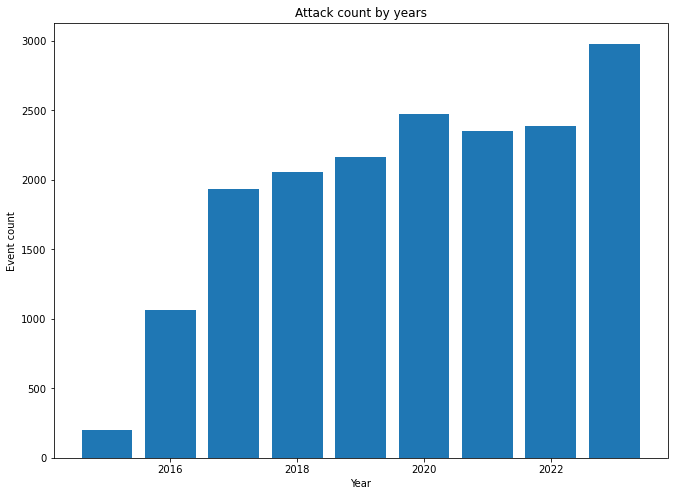

In [30]:
attack = {}
for y in ye:
    attack[y] = 0
    
for i in range(len(df['sub_event_type'])):
    if (df['sub_event_type'][i] == 'Attack'):
        attack[df['year'][i]] +=1
        
keys = list(attack.keys())
values = list(attack.values())

# Plotting
plt.figure(figsize=(11, 8))
plt.bar(keys, values)
plt.xlabel('Year')
plt.ylabel('Event count')
plt.title('Attack count by years')
plt.show()

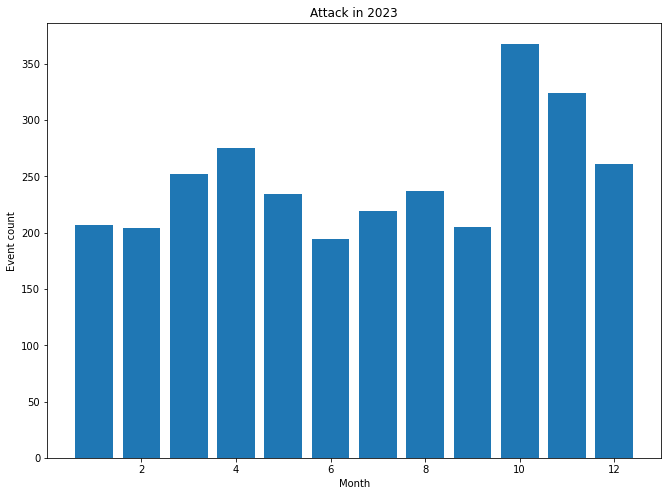

In [32]:
months = [1,2,3,4,5,6,7,8,9,10,11,12]
attack2023 = {}
for m in months:
    attack2023[m] = 0
    
for i in range(len(df['sub_event_type'])):
    if(df['year'][i]==2023 and df['sub_event_type'][i] == 'Attack'):
        date_string = df['event_date'][i]
        month_as_int = date_string.month
        attack2023[month_as_int] +=1

keys = list(attack2023.keys())
values = list(attack2023.values())

# Plotting
# Plotting
plt.figure(figsize=(11, 8))
plt.bar(keys, values)
plt.xlabel('Month')
plt.ylabel('Event count')
plt.title('Attack in 2023')
plt.show()

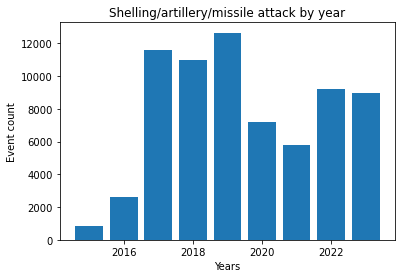

In [33]:
drone = {}
for y in ye:
    drone[y] = 0
    
for i in range(len(df['sub_event_type'])):
    if (df['sub_event_type'][i] == 'Shelling/artillery/missile attack'):
        drone[df['year'][i]] +=1
        
keys = list(drone.keys())
values = list(drone.values())

# Plotting
plt.bar(keys, values)
plt.xlabel('Years')
plt.ylabel('Event count')
plt.title('Shelling/artillery/missile attack by year')
plt.show()

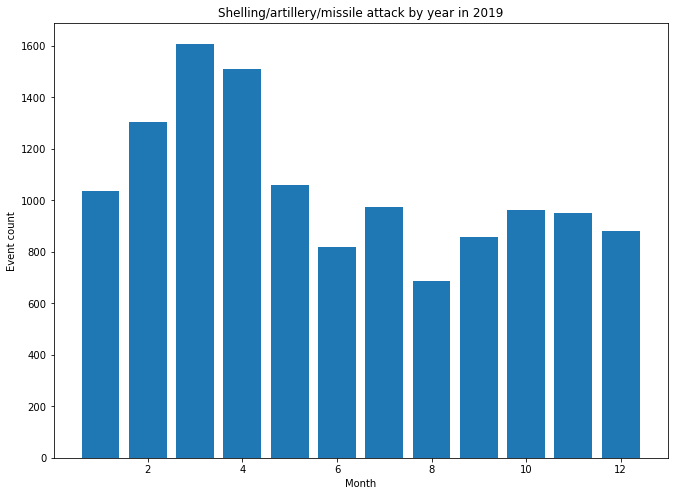

In [34]:
missile2019 = {}
for m in months:
    missile2019[m] = 0
    
for i in range(len(df['sub_event_type'])):
    if(df['year'][i]==2019 and df['sub_event_type'][i] == 'Shelling/artillery/missile attack'):
        date_string = df['event_date'][i]
        month_as_int = date_string.month
        missile2019[month_as_int] +=1

        
keys = list(missile2019.keys())
values = list(missile2019.values())

# Plotting
# Plotting
plt.figure(figsize=(11, 8))
plt.bar(keys, values)
plt.xlabel('Month')
plt.ylabel('Event count')
plt.title('Shelling/artillery/missile attack by year in 2019')
plt.show()

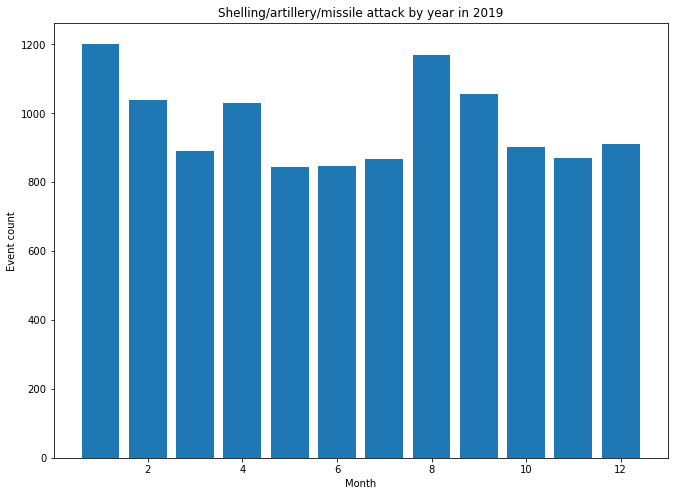

In [35]:
missile2017 = {}
for m in months:
    missile2017[m] = 0
    
for i in range(len(df['sub_event_type'])):
    if(df['year'][i]==2017 and df['sub_event_type'][i] == 'Shelling/artillery/missile attack'):
        date_string = df['event_date'][i]
        month_as_int = date_string.month
        missile2017[month_as_int] +=1

        
keys = list(missile2017.keys())
values = list(missile2017.values())

# Plotting
# Plotting
plt.figure(figsize=(11, 8))
plt.bar(keys, values)
plt.xlabel('Month')
plt.ylabel('Event count')
plt.title('Shelling/artillery/missile attack by year in 2019')
plt.show()

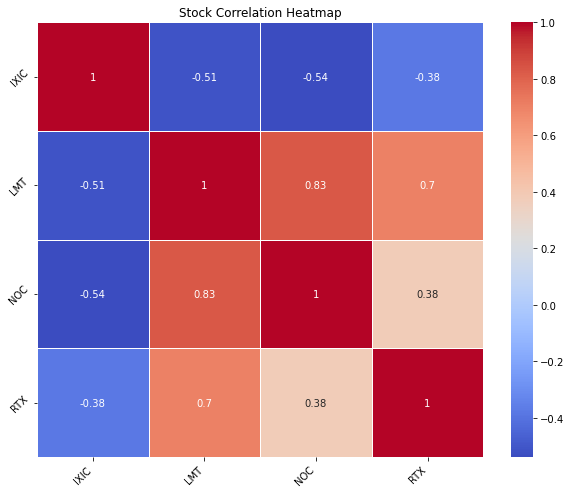

In [36]:
df1 = pd.read_csv('IXIC.csv', index_col='Date', parse_dates=True)['Adj Close'].rename('IXIC')
df2 = pd.read_csv('LMT.csv', index_col='Date', parse_dates=True)['Adj Close'].rename('LMT')
df3 = pd.read_csv('NOC.csv', index_col='Date', parse_dates=True)['Adj Close'].rename('NOC')
df4 = pd.read_csv('RTX.csv', index_col='Date', parse_dates=True)['Adj Close'].rename('RTX')


combined_df = pd.concat([df1, df2, df3, df4], axis=1)

correlation_matrix = combined_df.corr()


plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)


plt.title('Stock Correlation Heatmap')

heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=45)


plt.show()
